Attribute information For bank dataset

   Input variables:
   # bank client data:
<br>   1 - age (numeric)
<br>   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
<br>                                       "blue-collar","self-employed","retired","technician","services") 
<br>   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
<br>   4 - education (categorical: "unknown","secondary","primary","tertiary")
<br>   5 - default: has credit in default? (binary: "yes","no")
<br>   6 - balance: average yearly balance, in euros (numeric) 
<br>   7 - housing: has housing loan? (binary: "yes","no")
<br>   8 - loan: has personal loan? (binary: "yes","no")
<br>   # related with the last contact of the current campaign:
<br>   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
<br>  10 - day: last contact day of the month (numeric)
<br>  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
<br>  12 - duration: last contact duration, in seconds (numeric)
<br>   # other attributes:
<br>  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means <br>client was not previously contacted)
<br>  15 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
<br>
<br>  Output variable (desired target):
<br>  17 - y - has the client subscribed a term deposit? (binary: "yes","no")
<br>
<br>  18 - Missing Attribute Values: None
<br>Output variable -> y
<br>y -> Whether the client has subscribed a term deposit or not 
<br>Binomial ("yes" or "no")

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [42]:
with open("bankfull.csv","r") as file:
    lines = file.readlines()
    lines_list = []
    for line in lines:
        line = line.replace('"',"")
        line = line.replace(";"," ")
        line = line.split(" ")
        lines_list.append(line)

raw_data = pd.DataFrame(columns=lines_list[0],data=lines_list[1:])
lst = []
for i in raw_data.iloc[:,16]:
    i = i.replace("\n","")
    lst.append(i)

raw_data = raw_data.drop(labels="y\n",axis=1)
raw_data["y"] = pd.Series(lst)
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
data = raw_data.copy()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [45]:
data["age"] = pd.to_numeric(data["age"],errors="coerce")
data["job"] = data["job"].astype('category')
data["marital"] = data["marital"].astype('category')
data["education"] = data["education"].astype('category')
data["default"] = data["default"].astype('category')
data["balance"] = pd.to_numeric(data["balance"],errors="coerce")
data["housing"] = data["housing"].astype('category')
data["loan"] = data["loan"].astype('category')
data["contact"] = data["contact"].astype('category')
data["campaign"] = data["campaign"].astype("int64")
data["poutcome"] = data["poutcome"].astype('category')
data["y"] = data["y"].astype('category')
data["day"] = pd.to_numeric(data["day"],errors="coerce")
data["pdays"] = pd.to_numeric(data["pdays"],errors="coerce")
data["previous"] = pd.to_numeric(data["previous"],errors="coerce")
data["duration"] = pd.to_numeric(data["duration"],errors="coerce")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


In [46]:
data1 = pd.get_dummies(columns=['job','marital','education','contact','poutcome','month'],data=data)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   default              45211 non-null  category
 2   balance              45211 non-null  int64   
 3   housing              45211 non-null  category
 4   loan                 45211 non-null  category
 5   day                  45211 non-null  int64   
 6   duration             45211 non-null  int64   
 7   campaign             45211 non-null  int64   
 8   pdays                45211 non-null  int64   
 9   previous             45211 non-null  int64   
 10  y                    45211 non-null  category
 11  job_admin.           45211 non-null  uint8   
 12  job_blue-collar      45211 non-null  uint8   
 13  job_entrepreneur     45211 non-null  uint8   
 14  job_housemaid        45211 non-null  uint8   
 15  job_management     

In [48]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

<AxesSubplot:>

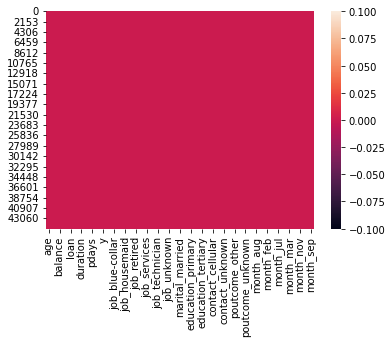

In [50]:
sns.heatmap(data1.isnull())

In [51]:
# Divide data set in X and y
X=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [52]:
# Divide  data in to Training data & Testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=42)

In [53]:
#Build Model 
model1 = LogisticRegression().fit(X_train,y_train)

C:\Users\AkashMY\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Predictions

In [54]:
y_predicted = model1.predict(X_test)

In [55]:
y_pred_df=pd.DataFrame({'actual_y':y_test,'y_pred_prob':y_predicted})
y_pred_df

,actual_y,y_pred_prob
3776,0,0
9928,0,0
33409,0,0
31885,0,1
15738,0,0
...,...,...
9016,0,0
380,0,0
7713,0,0
12188,0,0


# Testing Model Accuracy

In [56]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y_test,y_predicted)
confusion_matrix

array([[11732,   234],
       [ 1246,   352]], dtype=int64)

In [62]:
# The model accuracy is calculated by (T.P.+T.N.)/(T.P.+T.N.+F.P.+F.N.)
(11732+352)/(11732+234+1246+352)

0.8908876437629017

The Model accuracy is 89.08%,Means In total Clients model only 60% Correctly classified As Subscribed and Not Subscribed 

In [58]:
# The model Sensitivity is calculated by (T.P)/(T.P. + F.P)
1173/(1173+1246)

0.48491112029764366

The model Sensitivity is 0.48%,Means In total subscribed Clients model only 48.49% Correctly Classified

In [60]:
# The model Specificity is calculated by (T.N)/(T.N. + F.N)
352/(352+234)

0.6006825938566553

The model Specificity is 0.60%, Means In total Not subscribed Clients model only 60% Correctly classified

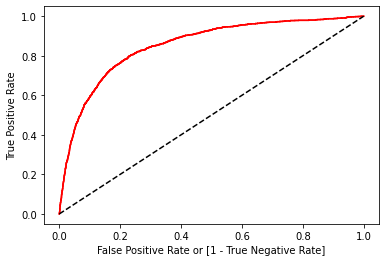

auc accuracy: 0.6003599685968818


In [61]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predicted)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)